In [15]:
from resnet import * 

In [1]:
import IPython
myurl='<iframe src="https://docs.google.com/presentation/d/e/2PACX-1vSmdt3WzOYXmWHr-UiTGeI2_8-Y3lF4nPhEpoJ_jDTu6laLGx8WTw53URWjaEReu3hnfQNBCl448ve4/embed?start=false&loop=false&delayms=60000" frameborder="0" width="860" height="489" allowfullscreen="true" mozallowfullscreen="true" webkitallowfullscreen="true"></iframe>'
IPython.display.HTML(myurl)


d:\ProgrammingRelated\AnacondaNavigator\envs\pytorch_gpu_cuda\Lib\site-packages\IPython\core\display.py:431: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [2]:
# !pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.6 MB 919.0 kB/s eta 0:00:42
   ---------------------------------------- 0.2/38.6 MB 1.5 MB/s eta 0:00:27
   ---------------------------------------- 0.3/38.6 MB 2.0 MB/s eta 0:00:20
    --------------------------------------- 0.6/38.6 MB 2.6 MB/s eta 0:00:15
   - -------------------------------------- 1.1/38.6 MB 4.0 MB/s eta 0:00:10
   -- ------------------------------------- 2.2/38.6 MB 6.9 MB/s eta 0:00:06
   --- ------------------------------------ 3.7/38.6 MB 10.2 MB/s eta 0:00:04
   ----- ---------------------------------- 5.3/38.6 MB 13.0 MB/s eta 0:00:03
   ------- -------------------------------- 7.0/38.6 MB 15.9 MB/s eta 0:00:02
   -------- ------------------------------- 8.5/38.6 MB 17.6 MB/s eta 0:00:02
   ---------- ----------------------------- 10.3/38.6 MB 21.9 MB/s eta 0:00:0

In [3]:
import torch
import torchvision
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image

In [10]:
# 

In [7]:
import requests

# URL of the image to download
urls = ["https://raw.githubusercontent.com/jacobgil/pytorch-grad-cam/master/examples/both.png", 
       "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRuoi37sXaQ3S4laQjOV1B-y_UjIZfqVpXMTq1FG4flow&s", 
       "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRJkO3h8lbOtqIKojwSUq-OdXM16Gqdw-EEPw&usqp=CAU",
       "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQBAVUIRwCIDpyojuE8GhrR4e0masBs9NEPUg&usqp=CAU"]

# Send a GET request to the URL
ctr=0
for url in urls:
    
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Save the image
        ctr+=1
        with open(f'input_image{ctr}.jpg', 'wb') as f:
            f.write(response.content)
        print("Image downloaded successfully.")
    else:
        print("Failed to download the image. Status code:", response.status_code)


Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.
Image downloaded successfully.


In [8]:
from torchvision.transforms.transforms import ToPILImage
from torchvision import transforms

In [9]:

model = torchvision.models.resnet50(pretrained=True)
model.eval()
target_layer= model.layer4[-1]

d:\ProgrammingRelated\AnacondaNavigator\envs\pytorch_gpu_cuda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\ProgrammingRelated\AnacondaNavigator\envs\pytorch_gpu_cuda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:
def ResNetModel(img_channel=3, num_classes=25, norm_type='bn'):
    return ResNet(Block, [2,2,2], img_channel, num_classes, norm_type)

In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [42]:
model2 = ResNetModel(img_channel=3, norm_type='gn',num_classes=25).to(device)

In [43]:
# state_dict = torch.load('model.pth')

In [46]:

model2

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (norm): GroupNorm()
  (relu): ReLU()
  (layer1): Sequential(
    (0): Block(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (nl1): GroupNorm()
      (nl2): GroupNorm()
      (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (relu): ReLU()
      (identity_downsample): Sequential(
        (0): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): GroupNorm()
      )
    )
    (1): Block(
      (conv1): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (nl1): GroupNorm()
      (nl2): GroupNorm()
      (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (relu): ReLU()
    )
  )
  (layer2): Sequential(
    (0): Block(
      (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=Fals

In [47]:
for name, param in model2.named_parameters():
    print(name, param.shape)


conv1.weight torch.Size([16, 3, 3, 3])
norm.gamma torch.Size([1, 4, 1, 1])
norm.beta torch.Size([1, 4, 1, 1])
layer1.0.conv1.weight torch.Size([16, 16, 3, 3])
layer1.0.nl1.gamma torch.Size([1, 4, 1, 1])
layer1.0.nl1.beta torch.Size([1, 4, 1, 1])
layer1.0.nl2.gamma torch.Size([1, 4, 1, 1])
layer1.0.nl2.beta torch.Size([1, 4, 1, 1])
layer1.0.conv2.weight torch.Size([32, 16, 3, 3])
layer1.0.identity_downsample.0.weight torch.Size([32, 16, 1, 1])
layer1.0.identity_downsample.1.gamma torch.Size([1, 4, 1, 1])
layer1.0.identity_downsample.1.beta torch.Size([1, 4, 1, 1])
layer1.1.conv1.weight torch.Size([16, 32, 3, 3])
layer1.1.nl1.gamma torch.Size([1, 4, 1, 1])
layer1.1.nl1.beta torch.Size([1, 4, 1, 1])
layer1.1.nl2.gamma torch.Size([1, 4, 1, 1])
layer1.1.nl2.beta torch.Size([1, 4, 1, 1])
layer1.1.conv2.weight torch.Size([32, 16, 3, 3])
layer2.0.conv1.weight torch.Size([32, 32, 3, 3])
layer2.0.nl1.gamma torch.Size([1, 4, 1, 1])
layer2.0.nl1.beta torch.Size([1, 4, 1, 1])
layer2.0.nl2.gamma tor

In [48]:
model2.eval()

ResNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (norm): GroupNorm()
  (relu): ReLU()
  (layer1): Sequential(
    (0): Block(
      (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (nl1): GroupNorm()
      (nl2): GroupNorm()
      (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (relu): ReLU()
      (identity_downsample): Sequential(
        (0): Conv2d(16, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): GroupNorm()
      )
    )
    (1): Block(
      (conv1): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (nl1): GroupNorm()
      (nl2): GroupNorm()
      (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (relu): ReLU()
    )
  )
  (layer2): Sequential(
    (0): Block(
      (conv1): Conv2d(32, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=Fals

In [32]:
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [50]:
target_layer= model2.layer3[-1]

In [33]:
target_layer= model.layer4[-1]

In [67]:
#pic=cv2.imread('both.png',1)
pic=cv2.imread('input_image1.jpg',1)
# BGR to RGB
img = pic.copy()
img=img[:,:,::-1]
img=np.ascontiguousarray(img)

# Convert the Torrch Tensor
trans=transforms.Compose([transforms.ToTensor()])
img=trans(img)

# Add Batch dimension
img=img.unsqueeze(0)

In [34]:
#pic=cv2.imread('both.png',1)
pic=cv2.imread('input_image1.jpg',1)
# BGR to RGB
img = pic.copy()
img=img[:,:,::-1]
img=np.ascontiguousarray(img)

# Convert the Torrch Tensor
trans=transforms.Compose([transforms.ToTensor()])
img=trans(img)

# Add Batch dimension
img=img.unsqueeze(0)

In [63]:
# Assuming you have 4 image filenames
image_files = ["input_image1.jpg", "input_image2.jpg", "input_image3.jpg", "input_image4.jpg"]

# Define a transformation to apply to each image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize each image to (224, 224)
    transforms.ToTensor()  # Convert each image to a PyTorch tensor
])

# Load each image, apply the transformation, and collect them in a list
images = []
for filename in image_files:
    image = Image.open(filename)
    image = transform(image)
    images.append(image)

# Stack the images along a new dimension (0) to create a single tensor
images_tensor = torch.stack(images, dim=0)

# Verify the shape of the final tensor
print(images_tensor.shape)  # Output: torch.Size([4, 3, 224, 224])

torch.Size([4, 3, 224, 224])


In [64]:
images_tensor.shape

torch.Size([4, 3, 224, 224])

In [68]:
def forward_hook(module,input,output):
  activation.append(output)

def backward_hook(module,grad_in,grad_out):
  grad.append(grad_out[0])

# Add hook to get the tensors
model.layer3[-1].register_forward_hook(forward_hook)
model.layer3[-1].register_backward_hook(backward_hook)


grad=[]
activation=[]

# forward pass to get activations
out=model(img)
print(torch.argmax(out))

# class for dog
loss=out[0,0]

# class for cat
loss=out[0,281]

# class for cat
loss=out[0,281]

# class for golf ball
loss=out[0,574]


# clear the gradients
model2.zero_grad()

# backward pass to get gradients
loss.backward()

# get the gradients and activations collected in the hook
grads=grad[0].cpu().data.numpy().squeeze()
fmap=activation[0].cpu().data.numpy().squeeze()

print(fmap.shape)
print(grads.shape)


tensor(243)
(1024, 14, 14)
(2048, 7, 7)


In [71]:
img = img.to('cuda')
img.shape

torch.Size([1, 3, 224, 224])

In [74]:
images_tensor= images_tensor.to(device)
images_tensor.shape

torch.Size([4, 3, 224, 224])

In [73]:


def forward_hook(module,input,output):
  activation.append(output)

def backward_hook(module,grad_in,grad_out):
  grad.append(grad_out[0])

# Add hook to get the tensors
model2.layer3[-1].register_forward_hook(forward_hook)
model2.layer3[-1].register_backward_hook(backward_hook)


grad=[]
activation=[]

# forward pass to get activations
out=model2(images_tensor)
print(torch.argmax(out))

# class for dog
loss=out[0,0]

# class for cat
loss=out[0,1]


# clear the gradients
model2.zero_grad()

# backward pass to get gradients
loss.backward()

# get the gradients and activations collected in the hook
grads=grad[0].cpu().data.numpy().squeeze()
fmap=activation[0].cpu().data.numpy().squeeze()

print(fmap.shape)
print(grads.shape)


AssertionError: 

In [36]:
print("grads.shape",grads.shape)
tmp=grads.reshape([grads.shape[0],-1])
# Get the mean value of the gradients of every featuremap
weights=np.mean(tmp,axis=1)
print("weights.shape",weights.shape)

grads.shape (2048, 7, 7)
weights.shape (2048,)


In [37]:
cam = np.zeros(grads.shape[1:])
for i,w in enumerate(weights):
  cam += w*fmap[i,:]

In [38]:
cam = np.zeros(grads.shape[1:])
for i,w in enumerate(weights):
  cam += w*fmap[i,:]
cam=(cam>0)*cam
print("cam.shape",cam.shape)
print(cam)
cam=cam/cam.max()*255
print(cam)
print(cam > 255*0.85)

cam.shape (7, 7)
[[-0.00000000e+00 -0.00000000e+00  1.67691392e-02  2.12635070e-02
   2.16438779e-02  2.02967858e-02  2.79840299e-03]
 [-0.00000000e+00  1.96304243e-02  9.43183550e-02  1.73006963e-01
   1.26417408e-01  1.13326455e-01  2.12086431e-03]
 [-0.00000000e+00  1.84743642e-02  1.14161403e-01  1.99547294e-01
   1.35103043e-01  1.14653533e-01 -0.00000000e+00]
 [-0.00000000e+00  9.19564324e-03  7.96038139e-02  9.89134829e-02
   2.63077087e-02  1.34511149e-02 -0.00000000e+00]
 [ 1.35019038e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 1.61620932e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00  1.71683968e-04 -0.00000000e+00]
 [ 1.98188203e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]]
[[-0.00000000e+00 -0.00000000e+00  2.14291580e+01  2.71724771e+01
   2.76585503e+01  2.59371114e+01  3.57605832e+00]
 [-0.00000000e+00  2.50855730e+01  1.20528723e

(224, 224, 3)
(224, 224)
(224, 224, 3)


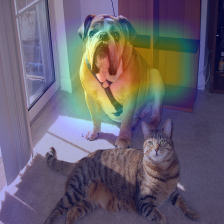

In [39]:
npic=np.array(torchvision.transforms.ToPILImage()(pic).convert('RGB'))
print(npic.shape)

cam = cv2.resize(cam,(npic.shape[1],npic.shape[0]))
print(cam.shape)

heatmap=cv2.applyColorMap(np.uint8(cam),cv2.COLORMAP_JET)

cam_img=npic*0.7+heatmap*0.3
print(cam_img.shape)
#display(Image.fromarray(heatmap[:,:,::-1]))
display(torchvision.transforms.ToPILImage()(np.uint8(cam_img[:,:,::-1])))